<a href="https://colab.research.google.com/github/ngzhiwei517/Crab-Age-Prediction/blob/main/Crab_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Crab Age Prediction dataset**

Now we will load our data set into data frames:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset
import pandas as pd
DATA_DIR = "/content/drive/MyDrive/ModifiedCrabAgePrediction.csv"
crabAge_df = pd.read_csv (DATA_DIR, header=0)

# **INFO OF DATA SET**

In [ ]:
#show the info of the data sets
crabAge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


In [ ]:
# Determine the datatype of Each Column by using dtypes
print (crabAge_df.dtypes)

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object


# **Identify categorical and numerical data**

In [ ]:
# Identify categorical and numerical variables
categorical_columns = crabAge_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = crabAge_df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Sex']
Numerical columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


# **Data Prepocessing Steps**

Handle missing values

Handle categorical variables

Determine and removing outliers

Scaling/normalizing the numerical features

Split the dataset into training and testing sets for model evaluation.


# **Checking for number of null value**

In [ ]:
print("Find missing value of each column using isna()")
print ( crabAge_df.isna().sum())

Find missing value of each column using isna()
Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


we can observe that there are missing value in length,diameter,height and weight column

Once missing data is detected, imputation methods can be applied to fill in the missing values.

For Numerical Data:

Mean: If the data is normally distributed or does not have significant outliers, replacing missing values with the mean can be a suitable approach.
Median: If the data contains outliers or is skewed, using the median to replace missing values might be more robust compared to the mean.
For Categorical Data:

Mode: Since categorical data doesn't have a notion of average or central tendency like numerical data, the mode (most frequent value) is used to impute missing values.

# **Impute missing value with mean**

In [ ]:
# Computation of the mean length by using mean ()
mean_length = crabAge_df.Length.mean ()
print()
print ("Mean length: %.2f" % mean_length)

# Impute the missing data with its mean by using fillna ()
crabAge_df.Length.fillna(mean_length, inplace=True)
print("\nImpute missing length data with mean value:")
print (crabAge_df.isna().sum())


Mean length: 1.31

Impute missing length data with mean value:
Sex                0
Length             0
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


In [ ]:
# Computation of the mean diameter by using mean ()
mean_diameter = crabAge_df.Diameter.mean ()
print()
print ("Mean Diameter: %.2f" % mean_diameter)

# Impute the missing data with its mean by using fillna ()
crabAge_df.Diameter.fillna(mean_diameter, inplace=True)
print("\nImpute missing diameter data with mean value:")
print (crabAge_df.isna().sum())


Mean Diameter: 1.02

Impute missing diameter data with mean value:
Sex                0
Length             0
Diameter           0
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


In [ ]:
# Computation of the mean height by using mean ()
mean_Height = crabAge_df.Height.mean ()
print()
print ("Mean Height: %.2f" % mean_Height)

# Impute the missing data with its mean by using fillna ()
crabAge_df.Height.fillna(mean_Height, inplace=True)
print("\nImpute missing height data with mean value:")
print (crabAge_df.isna().sum())


Mean Height: 0.35

Impute missing height data with mean value:
Sex                0
Length             0
Diameter           0
Height             0
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


# **Impute missing value with median**
** used median because the 'Weight' variable is too diverse**

In [ ]:
# Computation of Median value by using median ()
median_weight =crabAge_df.Weight.median()
print ("\nMedian duration: %.2f" % median_weight)

# Impute the missing data with its median by using fillna ()
crabAge_df.Weight.fillna(median_weight, inplace=True)
print("\nImpute missing data with median value:")
print (crabAge_df.isna().sum())


Median duration: 23.12

Impute missing data with median value:
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


In [ ]:
#After impute the missing value
crabAge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3500 non-null   float64
 2   Diameter        3500 non-null   float64
 3   Height          3500 non-null   float64
 4   Weight          3500 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


# **Identify categorical variable**

In [ ]:
# Separating Categorical Columns from Dataframe using select_dtypes()
import numpy as np
df_categorical =crabAge_df.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
print(df_categorical)

     Sex
0      F
1      M
2      I
3      F
4      I
...   ..
3495   I
3496   F
3497   I
3498   I
3499   I

[3500 rows x 1 columns]


# **Handling categorical variables**

In [ ]:
print(df_categorical['Sex'].unique())
print(df_categorical.Sex.value_counts())

['F' 'M' 'I']
Sex
M    1293
F    1110
I    1097
Name: count, dtype: int64


Replacing Categorical Data with Numbers where "F' as 1,"M" as 2 and "I" is 3


In [ ]:
import numpy as np

# Update 'Sex' column in the original DataFrame
crabAge_df['Sex'].replace({"F": 1, "M": 2, "I": 3}, inplace=True)

# Print the updated DataFrame
print(crabAge_df)

      Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       1  1.4375    1.1750  0.4125  24.635715       12.332033   
1       2  0.8875    0.6500  0.2125   5.400580        2.296310   
2       3  1.0375    0.7750  0.2500   7.952035        3.231843   
3       1  1.1750    0.8875  0.2500  13.480187        4.748541   
4       3  0.8875    0.6625  0.2125   6.903103        3.458639   
...   ...     ...       ...     ...        ...             ...   
3495    3  0.9375    0.6875  0.2375   6.988152        3.118445   
3496    1  1.5500    1.2125  0.4375  34.458817       15.450477   
3497    3  0.6250    0.4625  0.1625   2.012815        0.765436   
3498    3  1.0625    0.7750  0.2625  10.347568        4.507570   
3499    3  0.7875    0.6125  0.2125   4.068153        1.502523   

      Viscera Weight  Shell Weight  Age  
0           5.584852      6.747181    9  
1           1.374951      1.559222    6  
2           1.601747      2.764076    6  
3           2.282135      5.244657   10

# **Determine and removing outliers**

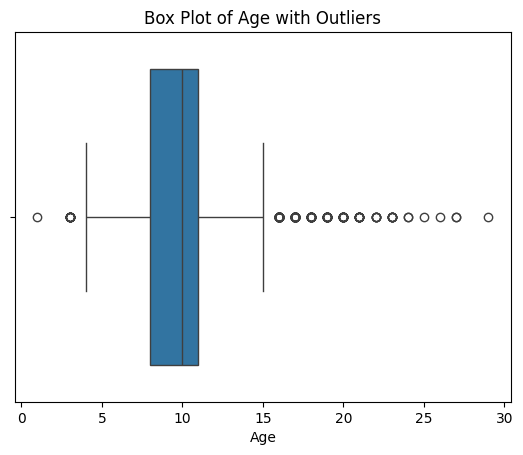

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crabAge_df is your DataFrame containing age data
sns.boxplot(data=crabAge_df, x='Age', orient='h', showfliers=True)  # Set showfliers=True
plt.title('Box Plot of Age with Outliers')
plt.show()


# **Displaying the outlier**

In [ ]:
max_age = crabAge_df.Age.max();
mean_age = crabAge_df.Age.mean();
min_age = crabAge_df.Age.min();
print(f'Maximum age: {max_age}, Minimum age: {min_age} \nMean age: {mean_age}')
#Find outliers for age
Q1 = crabAge_df.Age.quantile(0.25)
Q3 = crabAge_df.Age.quantile(0.75)
IQR = Q3-Q1
print(f"Q1: {Q1} , Q3: {Q3} , Interquatile range: {IQR}")
Outliers = crabAge_df[((crabAge_df["Age"] < (Q1 - 1.5 * IQR)) | (crabAge_df["Age"] > (Q3 + 1.5 * IQR)))]
print("\nOutliers")
print(Outliers)
#remove outliers
dat = crabAge_df[~(((crabAge_df["Age"] < (Q1 - 1.5 * IQR)) | (crabAge_df["Age"] > (Q3 + 1.5 * IQR))))]
print("\nData without outliers")
print(dat)

Maximum age: 29, Minimum age: 1 
Mean age: 9.977714285714285
Q1: 8.0 , Q3: 11.0 , Interquatile range: 3.0

Outliers
      Sex  Length  Diameter  Height     Weight  Shucked Weight  \
18      1  1.4875    1.1875  0.4250  35.351827       13.607760   
37      3  1.3750    1.1000  0.4125  24.394745        8.845044   
40      1  1.7750    1.4125  0.4875  48.945412       18.086981   
64      2  1.9375    1.4250  0.5500  57.606184       20.836883   
67      2  1.5750    1.2875  0.4000  28.803092       11.949314   
...   ...     ...       ...     ...        ...             ...   
3421    2  1.6250    1.3000  0.4750  38.115903       14.713390   
3435    2  1.6375    1.3125  0.4625  35.692020       13.806207   
3465    2  1.5125    1.1875  0.4000  45.812792       15.578050   
3474    1  1.2375    1.0000  0.3875  18.271253        6.860579   
3488    1  1.7125    1.3125  0.4375  48.477645       15.351254   

      Viscera Weight  Shell Weight  Age  
18          6.378637     12.048538   20  
37     

# **Removing the outlier**

In [ ]:
#Removing outliers
import pandas as pd

# Calculate quartiles and interquartile range (IQR) for 'Age' column
Q1 = crabAge_df['Age'].quantile(0.25)
Q3 = crabAge_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the 'Age' column
crabAge_df = crabAge_df[(crabAge_df['Age'] >= lower_bound) & (crabAge_df['Age'] <= upper_bound)]

# Display the DataFrame after removing outliers
print("Data without outliers:")
print(crabAge_df)


Data without outliers:
      Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       1  1.4375    1.1750  0.4125  24.635715       12.332033   
1       2  0.8875    0.6500  0.2125   5.400580        2.296310   
2       3  1.0375    0.7750  0.2500   7.952035        3.231843   
3       1  1.1750    0.8875  0.2500  13.480187        4.748541   
4       3  0.8875    0.6625  0.2125   6.903103        3.458639   
...   ...     ...       ...     ...        ...             ...   
3495    3  0.9375    0.6875  0.2375   6.988152        3.118445   
3496    1  1.5500    1.2125  0.4375  34.458817       15.450477   
3497    3  0.6250    0.4625  0.1625   2.012815        0.765436   
3498    3  1.0625    0.7750  0.2625  10.347568        4.507570   
3499    3  0.7875    0.6125  0.2125   4.068153        1.502523   

      Viscera Weight  Shell Weight  Age  
0           5.584852      6.747181    9  
1           1.374951      1.559222    6  
2           1.601747      2.764076    6  
3           2.28

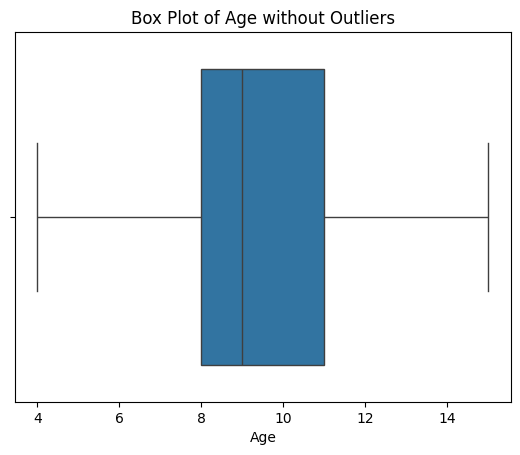

In [ ]:
sns.boxplot(data=crabAge_df, x='Age', orient='h')
plt.title('Box Plot of Age without Outliers')
plt.show()


# **Scaling the number features**

Scaling the number features refers to the process of transforming numerical data to a common scale, typically between 0 and 1 or another predefined range.
Min-Max Scaler has been used in this case.Min-Max scaling transforms the data such that the minimum value of the feature becomes 0 and the maximum value becomes 1.

In [ ]:
from sklearn import preprocessing
# Perform Standard Scaling and Implement fit_transform () method
# Using MinMax Scaler Method
minmax_scale = preprocessing.MinMaxScaler().fit_transform (crabAge_df)
scaled_frame = pd.DataFrame (minmax_scale, columns = crabAge_df.columns)
print (scaled_frame.head())

   Sex    Length  Diameter    Height    Weight  Shucked Weight  \
0  0.0  0.649635  0.675676  0.146018  0.310040        0.289953   
1  0.5  0.328467  0.297297  0.075221  0.065005        0.051247   
2  1.0  0.416058  0.387387  0.088496  0.097508        0.073500   
3  0.0  0.496350  0.468468  0.088496  0.167931        0.109575   
4  1.0  0.328467  0.306306  0.075221  0.084146        0.078894   

   Viscera Weight  Shell Weight       Age  
0        0.256275      0.295340  0.454545  
1        0.060106      0.064861  0.181818  
2        0.070674      0.118388  0.181818  
3        0.102378      0.228589  0.545455  
4        0.065390      0.071159  0.181818  


# **Shuffle the row**
Shuffle Rows Prior to Splitting Data into Features (X) and Outcome (Y)
.We shuffling to randomise the data, to avoid biasness before proceed to spliting the data

In [ ]:

from sklearn.utils import shuffle


scaled_frame_shuffled = shuffle(scaled_frame, random_state=42)
scaled_frame_shuffled.head()


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1644,0.0,0.416058,0.414414,0.101770,0.120982,0.091369,0.097094,0.134131,0.454545
134,0.5,0.729927,0.693694,0.163717,0.433189,0.354012,0.333554,0.401134,0.636364
411,0.0,0.766423,0.810811,0.146018,0.582160,0.438638,0.391017,0.641688,0.727273
203,0.5,0.729927,0.738739,0.154867,0.437161,0.370870,0.328930,0.423804,0.727273
1159,0.5,0.788321,0.747748,0.154867,0.547490,0.435604,0.587186,0.430101,0.545455


# **Split the data**

In [ ]:
# DV => Dependent variable
DV = 'Age'

# We drop DV,so that x only have the independent variables
x = scaled_frame_shuffled.drop (DV, axis=1) # axis=1, drop the DV column
y = scaled_frame_shuffled [DV]

x = scaled_frame_shuffled.drop(DV, axis=1) creates a new DataFrame x that contains all the columns (features) except for the dependent variable column

 The axis=1 parameter tells pandas to drop the column(s) along the column axis

y = scaled_frame_shuffled[DV] creates a pandas Series y that contains only the values of the dependent variable column

Below is the training:

20% for training, The rest for testing
random_state = 42 is used to select the 20% of the data set for testing randomly

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=42)

#Find the number of training set
num_samples_train = x_train.shape[0]
print("Number of samples in x_train:", num_samples_train)

#Find the number of testing set
num_samples_test = x_test.shape[0]
print("Number of samples in x_test:", num_samples_test)


Number of samples in x_train: 2616
Number of samples in x_test: 655


# **Regression Model Development**

**Multiple Regression Model**

Multiple regression model has been used to evaluate the performance

Model training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()                    # we create an object called model

# Fit model to training data
model.fit(x_train, y_train)

LinearRegression()

# **Prediction**
In multiple regression,We select all columns-table to test on

In [ ]:
y_predictions=model.predict(x_test)

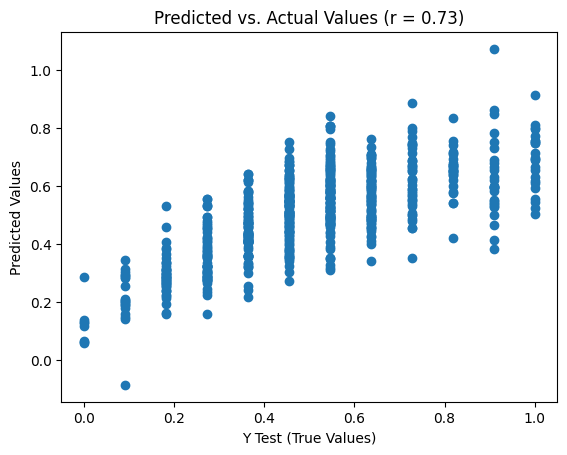

In [ ]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, y_predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test,y_predictions)[0], 2))
plt.show()

The above graph illustrates the correlation coefficient between the  the predicted values and actual values. Utilizing Pearson's correlation coefficient (r),the title of the plot denotes the correlation coefficient, approximately
0.73 means r=0.73, indicating a robust positive linear association between the observed and predicted values.

In [ ]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
[
'MSE',
'RMSE',
'R-Squared'], 'Value':

[metrics.mean_squared_error (y_test,y_predictions),
np.sqrt (metrics.mean_squared_error (y_test,y_predictions)),
metrics.explained_variance_score (y_test, y_predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MSE  0.023
1       RMSE  0.150
2  R-Squared  0.538


# **Polynomial regression model**

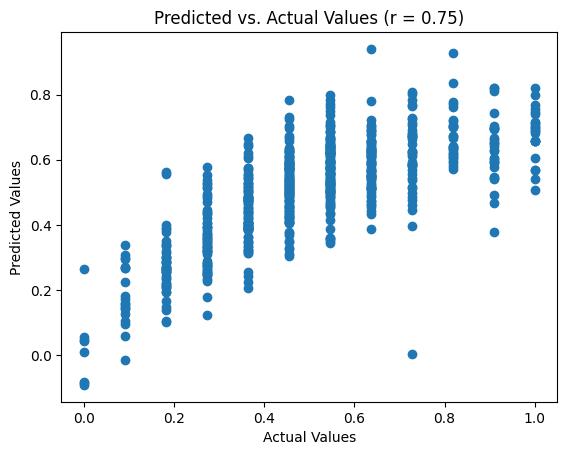


Polynomial Regression Model Evaluation:
Mean Squared Error	: 0.021457855004366613
Root Mean Squared Error	: 0.14648499924690792
R-squared		: 0.5623386822576386


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr  # Import pearsonr for correlation coefficient calculation

# Define the degree of the polynomial
degree = 2

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

# Fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions
predictions_poly = model_poly.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, predictions_poly)

# Plotting Scatter Plot
plt.scatter(y_test, predictions_poly)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, predictions_poly)
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearson_corr))
plt.show()



# Print Model Evaluation Metrics
print('\nPolynomial Regression Model Evaluation:')
print(f'Mean Squared Error\t: {mse_poly}')
print(f'Root Mean Squared Error\t: {rmse_poly}')
print(f'R-squared\t\t: {r2_poly}')


It seems like polynomial regression model is better than multiple linear regression model based on MSE,RMSE and R-squared value. So we will evaluate by using polynomial regression model.

# **Model Evaluation**

# **Ridge regularization**

Ridge regression has been used to evaluate the performance of model by using different evaluation metrics.
Alpha (α): This parameter controls the amount of regularization applied to the model. In my code, I use three different values for alpha: 0.001, 0.1, and 1.

A higher value of alpha (e.g., 1) means stronger regularization, which will shrink the coefficients more towards zero, potentially reducing the impact of less important features.

A lower value of alpha (e.g., 0.001) means weaker regularization, allowing the coefficients to take on larger values and potentially capture more complex relationships in the data.

L1_ratio: This hyperparameter determines the ratio of L1 (Lasso) to L2 (Ridge) regularization. The code explores three different values: 0 (pure L2 regularization), 0.5 (a combination of L1 and L2), and 1 (pure L1 regularization).

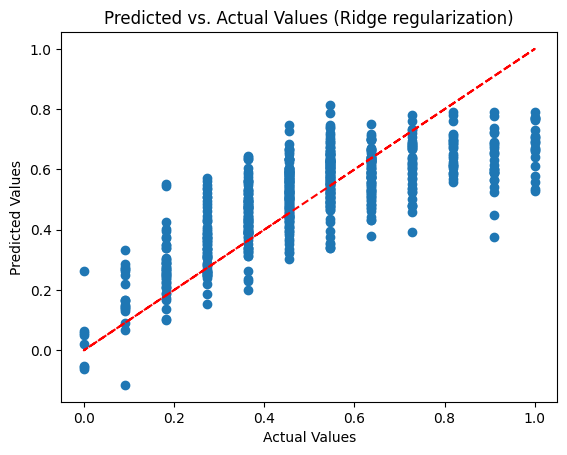


Polynomial Regression Model Evaluation with Ridge Regularization:
Mean Squared Error	: 0.02051284730974957
Root Mean Squared Error	: 0.14322306835754348
R-squared		: 0.5816133633857663


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define the degree of the polynomial
degree = 2

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

# Define the alpha values to search
alphas = np.logspace(-3, 2, 100)  # Search for alpha values from 0.001 to 100

# Initialize Ridge regressor
model = Ridge()

# Define the hyperparameter grid for randomized search
param_grid = {'alpha': alphas}

# Perform randomized search for the best alpha value
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_poly, y_train)

# Get the best model with the best alpha value
best_model = random_search.best_estimator_

# Predictions
predictions_poly = best_model.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, predictions_poly)

# Plotting Scatter Plot
plt.scatter(y_test, predictions_poly)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Straight line representing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, predictions_poly)
plt.title('Predicted vs. Actual Values (Ridge regularization)')
plt.show()

# Print Model Evaluation Metrics
print('\nPolynomial Regression Model Evaluation with Ridge Regularization:')
print(f'Mean Squared Error\t: {mse_poly}')
print(f'Root Mean Squared Error\t: {rmse_poly}')
print(f'R-squared\t\t: {r2_poly}')


# **Learning rate**

Best Model Parameters:
Mean Squared Error:	 0.02231386305442632
Root Mean Squared Error: 0.14937825495843202
R-squared: 0.544879266528016


<ipython-input-272-d90f4df731c5>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Plotting the diagonal line


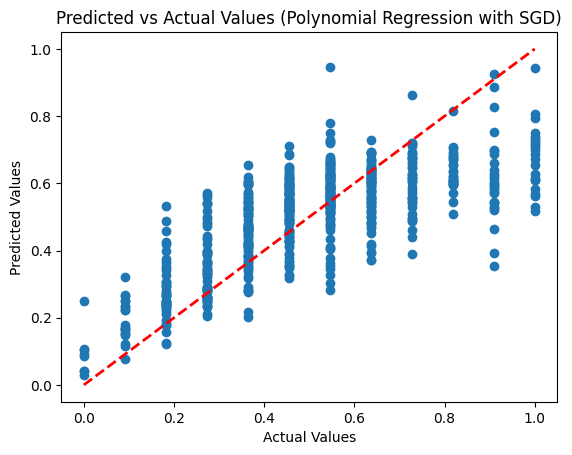

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the degree of the polynomial
degree = 2

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

# Define parameter grid for randomized search
param_grid = {
    'alpha': np.logspace(-3, 2, 100),  # Search for alpha values from 0.001 to 100
    'learning_rate': ['constant'],
    'eta0': uniform(0.001, 1.0)  # Uniform distribution for learning rate from 0.001 to 1.0
}

# Initialize SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_poly, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test_poly)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Best Model Parameters:")

print("Mean Squared Error:\t", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualize the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Plotting the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Polynomial Regression with SGD)')
plt.show()



# **Conclusion**

Based on the provided model evaluation results:

we consider each case using 5 decimal places for better comparision

**Polynomial Regression Model**

Mean Squared Error	:  0.02146

Root Mean Squared Error	: 0.14649

R-squared		: 0.56234


 **Polynomial Regression Model Evaluation with Ridge Regularization:**

Mean Squared Error	:  0.02051

Root Mean Squared Error	:  0.14322

R-squared		: 0.58161




**Polynomial Regression Model with Learning Rate (SGD regression):**

Mean Squared Error : 0.02231

Root Mean Squared Error : 0.14938

R-squared : 0.54488





Looking at the numbers, the model that used ridge regularization for polynomial regression gave the best results overall. Its mean squared error and root mean squared error values were the lowest, meaning its predictions had the smallest errors on average. It also had the highest R-squared value.

Best value:

Mean Squared Error : 0.02051

Root Mean Squared Error : 0.14322

R-squared : 0.58161